<a href="https://colab.research.google.com/github/Omar-Elleth/My-Website/blob/main/Dentella_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Dentella Deep Image Classifier Model* ♥️♥️

---






1.Setup and Load Data

1.1 Install Dependencies and Setup


In [50]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.22.1
b

In [51]:
import tensorflow as tf
import os

In [52]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [53]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [54]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

1.2 Remove Dodgy Images

In [55]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [56]:
data_dir = 'data'

In [57]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [58]:
image_exts[1]

'jpg'

In [59]:
os.listdir(os.path.join(data_dir , 'Clean'))

['021.jpg',
 '014.jpg',
 '589.jpg',
 '651.jpg',
 '202.jpg',
 '796.jpg',
 '990.jpg',
 '710.jpg',
 '010.jpg',
 '290.jpg',
 '918.jpg',
 '272.jpg',
 '431.jpg',
 '155.jpg',
 '388.jpg',
 '937.jpg',
 '505.jpg',
 '001.jpeg',
 '920.jpg',
 '649.jpg',
 '868.jpg',
 '167.jpg',
 '443.jpg',
 '337.jpg',
 '089.jpg',
 '847.jpg',
 '902.jpg',
 '709.jpg',
 '832.jpg',
 '282.jpeg',
 '860.jpg',
 '304.jpg',
 '118.jpg',
 '639.jpg',
 '550.jpg',
 '932.jpg',
 '809.jpg',
 '682.jpg',
 '301.jpg',
 '291.jpg',
 '120.jpg',
 '979.jpg',
 '012.jpg',
 '781.jpg',
 '790.jpg',
 '703.jpg',
 '497.jpg',
 '165.jpg',
 '784.jpg',
 '440.jpg',
 '066.jpg',
 '585.jpg',
 '818.jpg',
 '487.jpg',
 '040.jpg',
 '578.jpg',
 '714.jpg',
 '134.jpg',
 '096.jpg',
 '533.jpg',
 '378.jpeg',
 '163.jpg',
 '652.jpg',
 '645.jpg',
 '843.jpg',
 '944.jpg',
 '523.jpg',
 '110.jpg',
 '178.jpg',
 '618.jpg',
 '140.jpg',
 '850.jpeg',
 '208.jpg',
 '375.jpg',
 '659.jpg',
 '724.jpg',
 '042.jpg',
 '025.jpg',
 '723.jpg',
 '604.jpg',
 '947.jpg',
 '994.jpg',
 '959.jpg',


In [60]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    print(image)


021.jpg
014.jpg
589.jpg
651.jpg
202.jpg
796.jpg
990.jpg
710.jpg
010.jpg
290.jpg
918.jpg
272.jpg
431.jpg
155.jpg
388.jpg
937.jpg
505.jpg
001.jpeg
920.jpg
649.jpg
868.jpg
167.jpg
443.jpg
337.jpg
089.jpg
847.jpg
902.jpg
709.jpg
832.jpg
282.jpeg
860.jpg
304.jpg
118.jpg
639.jpg
550.jpg
932.jpg
809.jpg
682.jpg
301.jpg
291.jpg
120.jpg
979.jpg
012.jpg
781.jpg
790.jpg
703.jpg
497.jpg
165.jpg
784.jpg
440.jpg
066.jpg
585.jpg
818.jpg
487.jpg
040.jpg
578.jpg
714.jpg
134.jpg
096.jpg
533.jpg
378.jpeg
163.jpg
652.jpg
645.jpg
843.jpg
944.jpg
523.jpg
110.jpg
178.jpg
618.jpg
140.jpg
850.jpeg
208.jpg
375.jpg
659.jpg
724.jpg
042.jpg
025.jpg
723.jpg
604.jpg
947.jpg
994.jpg
959.jpg
195.jpg
688.jpg
565.jpg
499.jpg
674.jpg
881.jpg
489.jpeg
004.png
583.jpg
003.jpg
050.jpeg
886.jpg
174.jpg
512.jpg
970.jpg
591.jpg
284.jpg
247.jpg
945.jpg
084.jpg
107.jpg
804.jpg
415.jpg
315.jpg
400.jpg
549.jpg
705.jpg
377.jpg
559.jpg
955.jpg
264.jpg
547.jpg
463.jpg
199.jpg
423.jpg
912.jpg
974.jpg
731.jpg
841.jpg
114.jpg
053.jpg
49

In [61]:
cv2.imread(os.path.join('data' , 'Clean' , '395.jpg'))

array([[[171, 182, 226],
        [172, 183, 227],
        [173, 185, 227],
        ...,
        [160, 174, 222],
        [161, 175, 223],
        [163, 177, 225]],

       [[171, 182, 226],
        [172, 183, 227],
        [174, 186, 228],
        ...,
        [160, 174, 222],
        [161, 175, 223],
        [163, 177, 225]],

       [[172, 184, 226],
        [173, 185, 227],
        [174, 186, 228],
        ...,
        [160, 174, 222],
        [161, 175, 223],
        [162, 176, 224]],

       ...,

       [[194, 205, 232],
        [194, 205, 232],
        [194, 205, 232],
        ...,
        [153, 164, 194],
        [154, 165, 195],
        [154, 165, 195]],

       [[193, 204, 231],
        [193, 204, 231],
        [193, 204, 231],
        ...,
        [153, 164, 194],
        [153, 164, 194],
        [154, 165, 195]],

       [[189, 202, 228],
        [189, 202, 228],
        [190, 203, 229],
        ...,
        [151, 163, 191],
        [151, 163, 191],
        [152, 164, 192]]

In [62]:
img = cv2.imread(os.path.join('data','Clean','666.jpg'))

In [63]:
img.shape

(159, 318, 3)

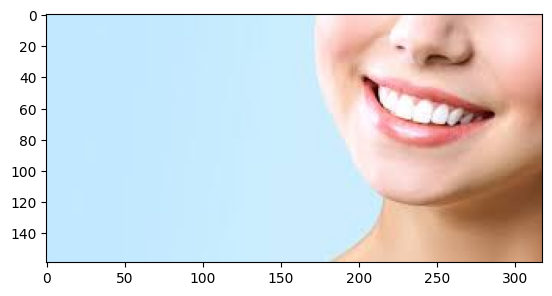

In [64]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

1.3 Load Data

In [66]:
import numpy as np
from matplotlib import pyplot as plt

In [67]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 1335 files belonging to 2 classes.


In [68]:
data_iterator = data.as_numpy_iterator()

In [69]:
data_iterator

In [70]:
# Get Another Batch from iterator
batch = data_iterator.next()

In [71]:
# Image Represented as Numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [72]:
# Class 1 = Clean Teeth
# Class 0 = Bad Teeth
batch[1]

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int32)

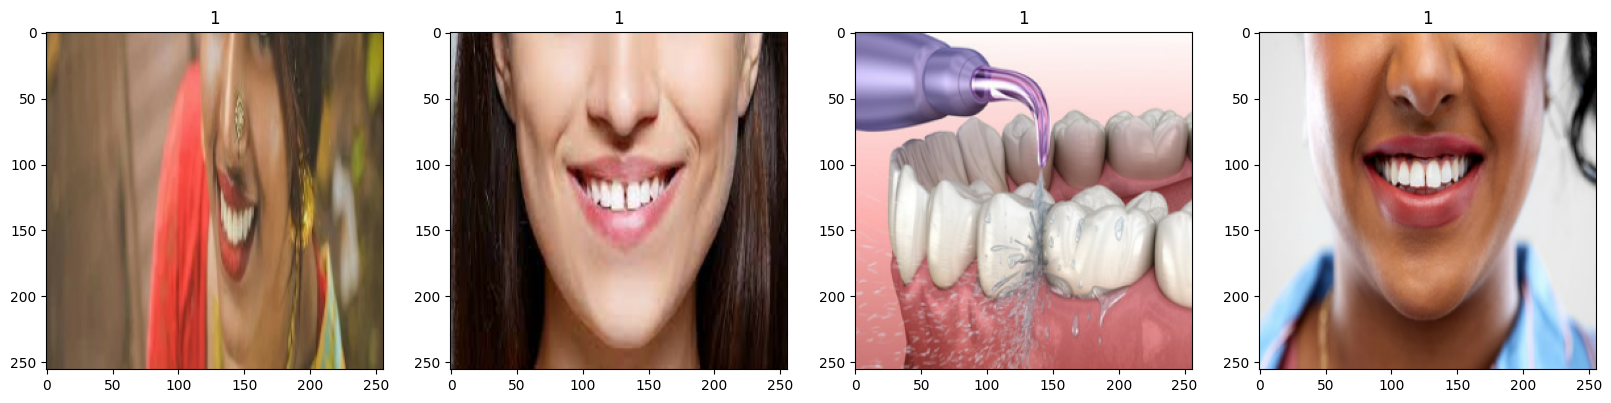

In [73]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [74]:
scaled = batch[0] / 255

In [75]:
scaled.max()

1.0

2. Preprocess Data

2.1 Scale Data

In [76]:
data = data.map(lambda x,y: (x/255, y))

In [77]:
scaled_iterator = data.as_numpy_iterator()

In [78]:
batch = scaled_iterator.next()

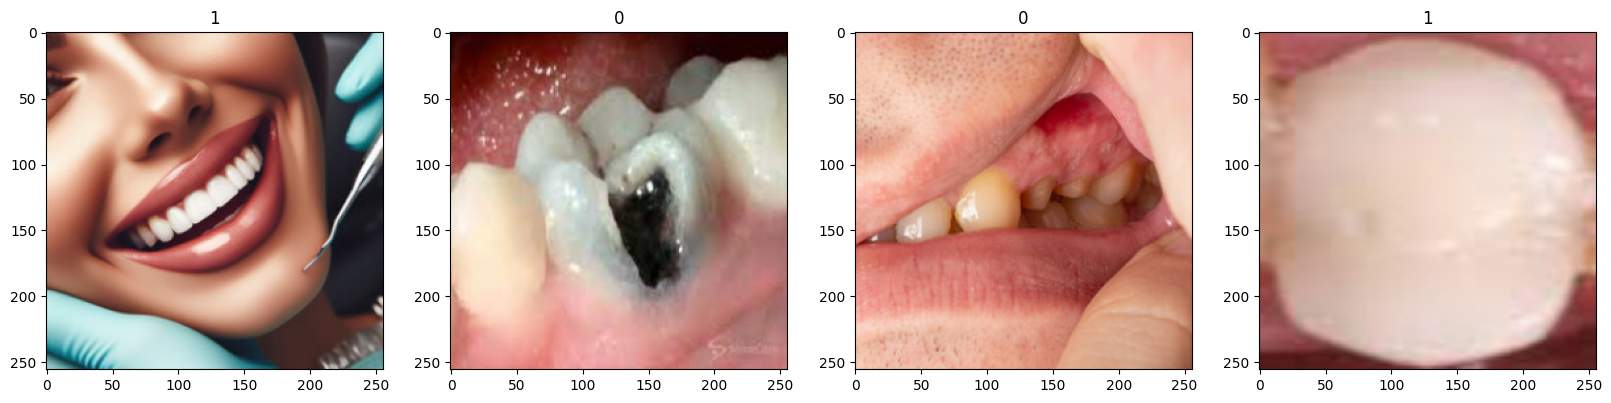

In [79]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [80]:
len(data)

42

In [81]:
train_size = int(len(data) * 0.7)
val_size = int(len(data) * 0.09)
test_size = 42 - (train_size + val_size)


In [82]:
train_size + val_size + test_size

42

In [83]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [84]:
len(test)

10

3. Deep Model

3.1 Build Deep Learning Model

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [86]:
model = Sequential()

In [87]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [88]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

3.2 Train

In [90]:
logdir='logs'

In [91]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [92]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
29/29 [==============================] - 75s 2s/step - loss: 0.7525 - accuracy: 0.5248 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 2/20
29/29 [==============================] - 73s 2s/step - loss: 0.6621 - accuracy: 0.6142 - val_loss: 0.6530 - val_accuracy: 0.5833
Epoch 3/20
29/29 [==============================] - 64s 2s/step - loss: 0.5844 - accuracy: 0.7026 - val_loss: 0.6754 - val_accuracy: 0.6250
Epoch 4/20
29/29 [==============================] - 64s 2s/step - loss: 0.4634 - accuracy: 0.7780 - val_loss: 0.4282 - val_accuracy: 0.8438
Epoch 5/20
29/29 [==============================] - 63s 2s/step - loss: 0.3470 - accuracy: 0.8610 - val_loss: 0.4235 - val_accuracy: 0.8229
Epoch 6/20
29/29 [==============================] - 70s 2s/step - loss: 0.2654 - accuracy: 0.8966 - val_loss: 0.5426 - val_accuracy: 0.7604
Epoch 7/20
29/29 [==============================] - 68s 2s/step - loss: 0.2034 - accuracy: 0.9310 - val_loss: 0.5161 - val_accuracy: 0.8021
Epoch 8/20
29/29 [==

3.3 Plot Peformance

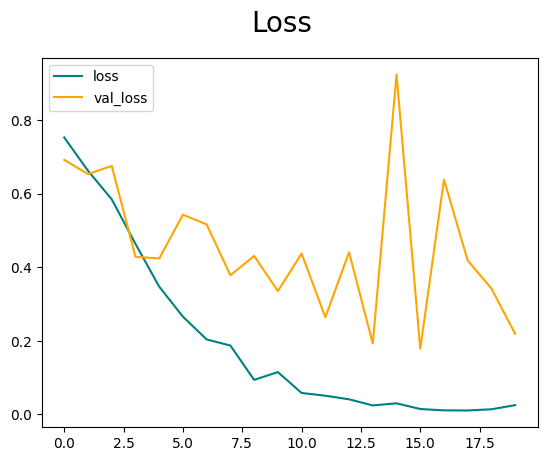

In [93]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

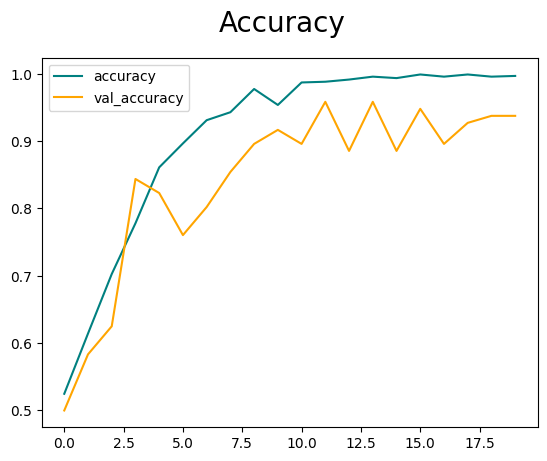

In [94]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

4. Evaluate Performance

4.1 Evaluate

In [95]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [96]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [97]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 781ms/step


In [105]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy}')

Precision:0.8807947039604187, Recall:0.8692810535430908, Accuracy:<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=float32, numpy=0.8778135>>


4.2 Test

In [106]:
import cv2

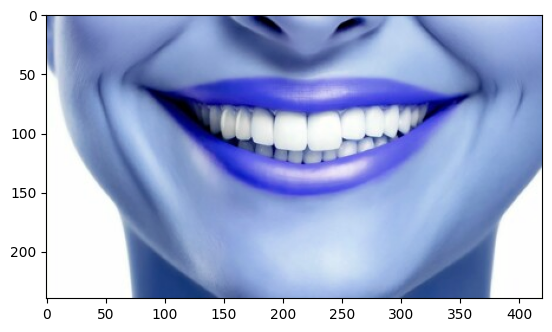

In [217]:
img = cv2.imread('clean_01.jpg')
plt.imshow(img)
plt.show()

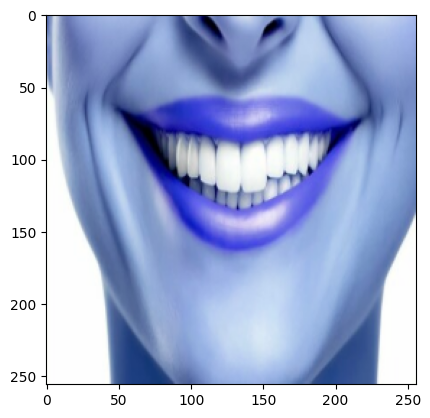

In [218]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [219]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 60ms/step


In [220]:
yhat

array([[0.99993485]], dtype=float32)

In [221]:
if yhat > 0.5:
    print(f'Predicted that Your teeth are Good and You dont need to see a Doctor')
else:
    print(f'Predicted that your teeth are decayed and you need to see a Doctor')

Predicted that Your teeth are Good and You dont need to see a Doctor


Save Model

In [115]:
from tensorflow.keras.models import load_model

In [116]:
model.save(os.path.join('models','imageclassifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [117]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [119]:
yhat = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 40ms/step


In [120]:
if yhat > 0.5:
    print(f'Predicted that Your teeth are Good and You dont need to see a Doctor')
else:
    print(f'Predicted that your teeth are decayed and you need to see a Doctor')

Predicted that your teeth are decayed and you need to see a Doctor


# End...♥️